# Optimal LHS designs

This examples show how to generate optimized LHS experiments according to the different criteria.

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

**LHS and space filling**

In [2]:
N = 100
# Considering independent Uniform distributions of dimension 3
# Bounds are (-1,1), (0,2) and (0, 0.5)
distribution = ot.ComposedDistribution([ot.Uniform(-1.0, 1.0), ot.Uniform(0.0, 2.0), ot.Uniform(0.0, 0.5)])
# Random LHS
lhs = ot.LHSExperiment(distribution, N)
lhs.setAlwaysShuffle(True) # randomized
design = lhs.generate()
# C2
c2 = ot.SpaceFillingC2().evaluate(design)
# PhiP with default p
phip = ot.SpaceFillingPhiP().evaluate(design)
# mindist
mindist = ot.SpaceFillingMinDist().evaluate(design)
# For p->infinity
phip_inf = ot.SpaceFillingPhiP(100).evaluate(design)
print(phip, mindist, phip_inf)

20.75140419617469 0.03521949453939968 20.7514041675596


**Optimized LHS using Monte Carlo**

As with Monte Carlo, user decides of a fixed number of iterations,
but this time this number is part of the temperature profile.

Two profiles are currently provided:
- Linear profile: $T_i = T_0 (1-\frac{1}{n_{iter}})$
- Geometric profile: $T_i = T_O c^i, 0<c<1$

Starting from an LHS design, a new design is built by permuting a random coordinate of two randomly chosen sample points; this new design is also an LHS. but not necessary a more efficient design.

A comparison of criteria of the two designs is done, and the new LHS is accepted with probability

$$min\left(exp{\left[-\frac{\Phi(LHS_{new}) - \Phi(LHS)}{T_i}\right]}, 1\right)$$

In [3]:
# Considering independent Uniform(0,1) distributions of dimension 3
distribution = ot.ComposedDistribution([ot.Uniform(0.0, 1.0)] * 3)
# Random LHS
lhs = ot.LHSExperiment(distribution, N)
lhs.setAlwaysShuffle(True) # randomized
algo = ot.SimulatedAnnealingLHS(lhs)
design = algo.generate()

In [4]:
# One could also fix the criterion, the temperature profile and get more results.

# Considering independent Uniform distributions of dimension 3
# Bounds are (-1,1), (0,2) and (0, 0.5)
distribution = ot.ComposedDistribution([ot.Uniform(-1.0, 1.0), ot.Uniform(0.0, 2.0), ot.Uniform(0.0, 0.5)])
# Random LHS
lhs = ot.LHSExperiment(distribution, N)
lhs.setAlwaysShuffle(True) # randomized
# Fixing C2 crit
space_filling = ot.SpaceFillingC2()
# Defining a temperature profile
# A geometric profile seems accurate with default parameters
# e.g. T0=10, c=0.95, iMax=2000
temperatureProfile = ot.GeometricProfile()
algo = ot.SimulatedAnnealingLHS(lhs, temperatureProfile, space_filling)
# optimal design
design = algo.generate()
result = algo.getResult()
# Criteria for the optimal design
crit_c2 = result.getC2()
crit_phip = result.getPhiP()
crit_mindist = result.getMinDist()
# History of the criterion used for optimization
history = result.getAlgoHistory()
criterion_hist = history[:, 0]
# Additional results
temperature_hist = history[:, 1]
probability_hist = history[:, 2]

In [5]:
# It is also possible to chain several iterations of the whole process with different starting points.
N= 10

# Considering independent Uniform distributions of dimension 3
# Bounds are (-1,1), (0,2) and (0, 0.5)
distribution = ot.ComposedDistribution([ot.Uniform(-1.0, 1.0), ot.Uniform(0.0, 2.0), ot.Uniform(0.0, 0.5)])
# Random LHS
lhs = ot.LHSExperiment(distribution, N)
lhs.setAlwaysShuffle(True) # randomized
# Fixing PhiP crit
space_filling = ot.SpaceFillingPhiP()
# Defining a temperature profile
# T0=10, iMax=3000
temperatureProfile = ot.LinearProfile(10.0, 3000)
algo = ot.SimulatedAnnealingLHS(lhs, temperatureProfile, space_filling)
restart = 50
design = algo.generateWithRestart(restart)
# Retrieve all optimal designs
result = algo.getResult()
designs = [result.getOptimalDesign(i) for i in range(restart)]

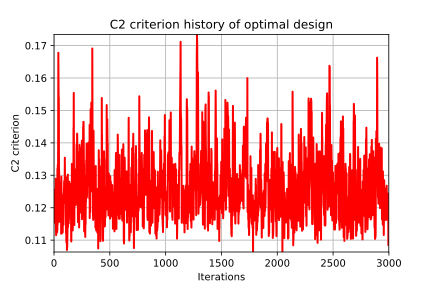

In [6]:
# Finally, we could start the optimization process of LHS using a precomputed LHS design.

# Considering independent Uniform distributions of dimension 3
# Bounds are (0,1)^3
distribution = ot.ComposedDistribution([ot.Uniform(0.0, 1.0)] * 3)
# Random LHS
lhs = ot.LHSExperiment(distribution, N)
lhs.setAlwaysShuffle(True) # randomized
# Fixing C2 crit for example
space_filling = ot.SpaceFillingC2()
# Defining a temperature profile
# T0=10, iMax=3000
temperatureProfile = ot.LinearProfile(10.0, 3000)
algo = ot.SimulatedAnnealingLHS(lhs, temperatureProfile, space_filling)
design = algo.generate()
result = algo.getResult()
# check history ==> draw criterion
result.drawHistoryCriterion()

In [7]:
# Convergence needs to be performed
# New algo starting from this design
algo = ot.SimulatedAnnealingLHS(design, distribution, temperatureProfile, space_filling)
design = algo.generate()